## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import gzip

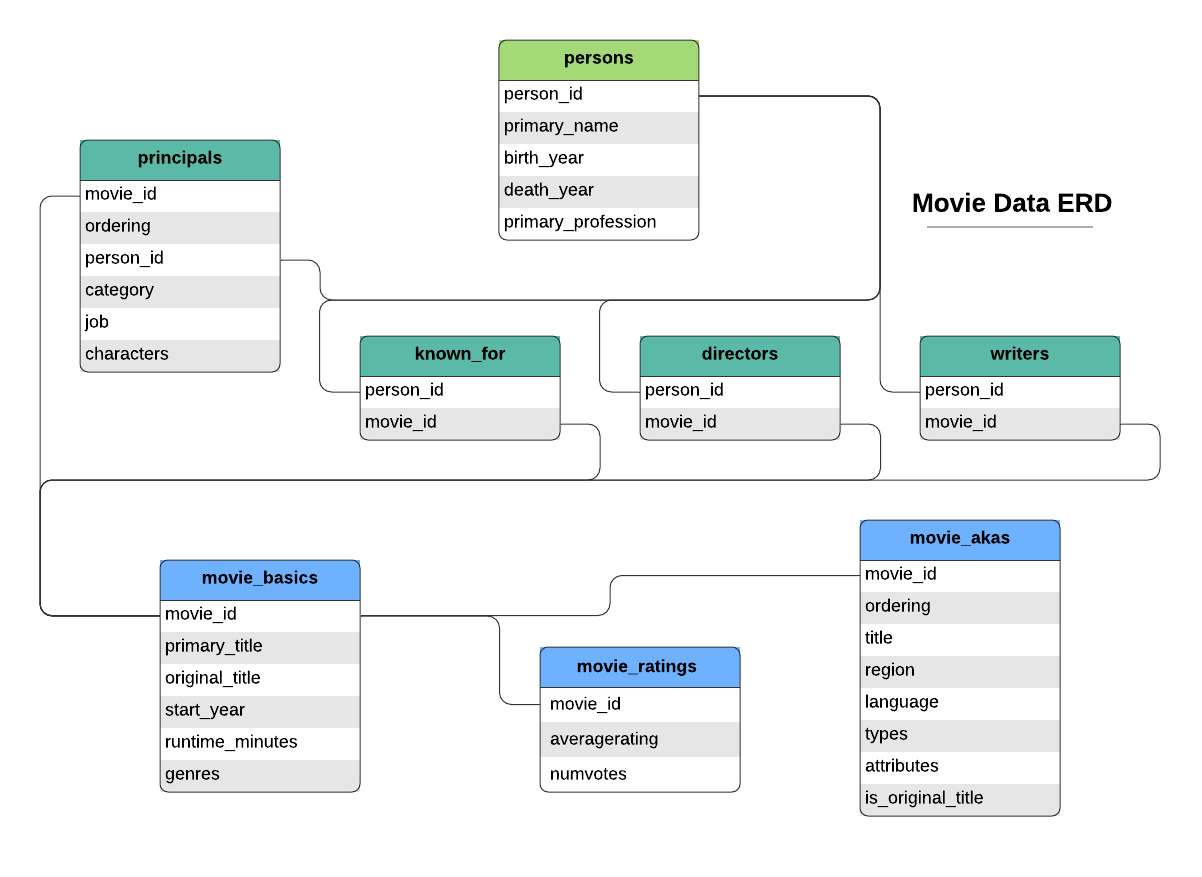

In [3]:
from IPython.display import Image
Image(filename='movie_data_erd.jpeg') 

In [4]:
import zipfile
import sqlite3

with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData/')

conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()
pd.read_sql_query("""

SELECT * 
FROM movie_basics;


""", conn)


movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2                        The Other Side of the Wind        2018   
3                                   Sabse Bada Sukh        2018   
4                             La Telenovela Errante        2017   
...                                             ...         ...   
146139                          Kuambil Lagi Hatiku        2019   
146140  Rodolpho Teóphilo - O Legado de um Pioneiro        2015   
146141                              Dankyavar Danka        2013   
146142                                       6 Gunn        2017   
146143               Chico Albuquerque - Revelações        2013   

        runtime_minutes                genres  
0                 175.0    Action,Crime,Drama  
1                 114.0       Biography,Drama  
2                 122.0                 Drama  
3                   NaN          Comedy,Drama  
4                  80.0  Comedy,Drama,Fantasy  
...                 ...                   ...  
146139            123.0                 Drama  
146140              NaN           Documentary  
146141              NaN                Comedy  
146142            116.0                  None  
146143              NaN           Documentary  

[146144 rows x 6 columns]

In [12]:
pd.read_sql_query("""

SELECT * 
FROM movie_ratings;


""", conn)

movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]

In [13]:
pd.read_sql_query("""

SELECT * 
FROM sqlite_master 
WHERE type='table';



""", conn)

type           name       tbl_name  rootpage  \
0  table   movie_basics   movie_basics         2   
1  table      directors      directors         3   
2  table      known_for      known_for         4   
3  table     movie_akas     movie_akas         5   
4  table  movie_ratings  movie_ratings         6   
5  table        persons        persons         7   
6  table     principals     principals         8   
7  table        writers        writers         9   

                                                 sql  
0  CREATE TABLE "movie_basics" (\n"movie_id" TEXT...  
1  CREATE TABLE "directors" (\n"movie_id" TEXT,\n...  
2  CREATE TABLE "known_for" (\n"person_id" TEXT,\...  
3  CREATE TABLE "movie_akas" (\n"movie_id" TEXT,\...  
4  CREATE TABLE "movie_ratings" (\n"movie_id" TEX...  
5  CREATE TABLE "persons" (\n"person_id" TEXT,\n ...  
6  CREATE TABLE "principals" (\n"movie_id" TEXT,\...  
7  CREATE TABLE "writers" (\n"movie_id" TEXT,\n  ...

In [15]:
pd.set_option("display.max_rows", None)

In [53]:
pd.read_sql_query("""

SELECT primary_title, runtime_minutes, genres, averagerating
FROM movie_basics
JOIN movie_ratings
    USING(movie_id);

""", conn)

primary_title  runtime_minutes                genres  \
0                            Sunghursh            175.0    Action,Crime,Drama   
1      One Day Before the Rainy Season            114.0       Biography,Drama   
2           The Other Side of the Wind            122.0                 Drama   
3                      Sabse Bada Sukh              NaN          Comedy,Drama   
4             The Wandering Soap Opera             80.0  Comedy,Drama,Fantasy   
...                                ...              ...                   ...   
73851                 Diabolik sono io             75.0           Documentary   
73852                Sokagin Çocuklari             98.0          Drama,Family   
73853                        Albatross              NaN           Documentary   
73854       La vida sense la Sara Amat              NaN                  None   
73855                       Drømmeland             72.0           Documentary   

       averagerating  
0                7.0  
1                7.2  
2                6.9  
3                6.1  
4                6.5  
...              ...  
73851            6.2  
73852            8.7  
73853            8.5  
73854            6.6  
73855            6.5  

[73856 rows x 4 columns]

In [52]:
pd.read_sql_query("""

SELECT primary_title, runtime_minutes, genres, averagerating
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
    WHERE averagerating > 8 AND runtime_minutes <= 130;

""", conn)

primary_title  runtime_minutes                      genres  \
0               Joe Finds Grace             83.0  Adventure,Animation,Comedy   
1             The Final Journey            120.0                       Drama   
2                       Bubbles             80.0                       Drama   
3                   The Rescuer             84.0                 Documentary   
4                   Toy Story 3            103.0  Adventure,Animation,Comedy   
...                         ...              ...                         ...   
6503                  Pengalila            111.0                       Drama   
6504                Hand Rolled             90.0                 Documentary   
6505                Unstoppable             84.0                 Documentary   
6506  Padmavyuhathile Abhimanyu            130.0                       Drama   
6507          Sokagin Çocuklari             98.0                Drama,Family   

      averagerating  
0               8.1  
1               8.8  
2               8.6  
3               8.7  
4               8.3  
...             ...  
6503            8.4  
6504            9.3  
6505            8.1  
6506            8.4  
6507            8.7  

[6508 rows x 4 columns]

In [5]:
pd.read_sql_query("""

SELECT primary_title, runtime_minutes, genres, averagerating
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
    WHERE runtime_minutes IS NOT NULL AND averagerating IS NOT NULL AND averagerating >= 8
    ORDER BY averagerating DESC, runtime_minutes ASC;

""", conn)

primary_title  runtime_minutes  \
0                                 I Was Born Yesterday!             31.0   
1                                 Requiem voor een Boom             48.0   
2        Exteriores: Mulheres Brasileiras na Diplomacia             52.0   
3                   The Paternal Bond: Barbary Macaques             59.0   
4                       Fly High: Story of the Disc Dog             65.0   
...                                                 ...              ...   
8046                      Bike and Old Electronic Piano            174.0   
8047                  Royal Shakespeare Company: Hamlet            175.0   
8048                                           Maharshi            176.0   
8049                                 A Study in Gravity            180.0   
8050  The Medal of Honor: The Stories of Our Nation'...            244.0   

                           genres  averagerating  
0                     Documentary           10.0  
1                     Documentary           10.0  
2                     Documentary           10.0  
3                     Documentary           10.0  
4                     Documentary           10.0  
...                           ...            ...  
8046                  Documentary            8.0  
8047                        Drama            8.0  
8048                 Action,Drama            8.0  
8049          Drama,Fantasy,Music            8.0  
8050  Adventure,Documentary,Drama            8.0  

[8051 rows x 4 columns]

In [7]:
pd.read_sql_query("""

SELECT primary_title, runtime_minutes, genres, averagerating
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
    WHERE runtime_minutes IS NOT NULL AND averagerating IS NOT NULL AND averagerating >= 9
    ORDER BY runtime_minutes DESC, averagerating DESC
    LIMIT 100;

""", conn)

primary_title  runtime_minutes  \
0                                        Paint Drying            607.0   
1              Depeche Mode: Video Singles Collection            383.0   
2                    Catholicism: The Pivotal Players            379.0   
3   The Ultimate History Lesson: A Weekend with Jo...            300.0   
4                  September 11: The New Pearl Harbor            300.0   
..                                                ...              ...   
95                                Mi Chiamava Valerio            120.0   
96                                         On a Quest            120.0   
97                                          Wild Ride            120.0   
98                        Deadmau5 Live @ Earls Court            120.0   
99                                      Babysplitters            119.0   

                         genres  averagerating  
0                   Documentary            9.3  
1                         Music            9.2  
2                   Documentary            9.2  
3                   Documentary            9.3  
4                   Documentary            9.0  
..                          ...            ...  
95          Drama,History,Sport            9.0  
96  Biography,Documentary,Drama            9.0  
97                        Drama            9.0  
98                        Music            9.0  
99                       Comedy            9.3  

[100 rows x 4 columns]

In [16]:
pd.read_sql_query("""

SELECT runtime_minutes, COUNT(*) as count
FROM (
    SELECT primary_title, runtime_minutes, genres, averagerating
    FROM movie_basics
    JOIN movie_ratings
        USING(movie_id)
        WHERE runtime_minutes IS NOT NULL AND averagerating IS NOT NULL
        ORDER BY runtime_minutes DESC, averagerating DESC
)
GROUP BY runtime_minutes
ORDER BY count DESC;

""", conn)

runtime_minutes  count
0               90.0   4742
1               80.0   2166
2               85.0   2057
3              100.0   1957
4               95.0   1933
5               93.0   1547
6               88.0   1487
7               92.0   1434
8               87.0   1381
9               94.0   1378
10              86.0   1352
11              75.0   1297
12              98.0   1284
13              91.0   1273
14              96.0   1266
15              82.0   1252
16              89.0   1247
17              97.0   1226
18              84.0   1208
19             105.0   1198
20              83.0   1155
21             110.0   1019
22              70.0    937
23              99.0    907
24             120.0    902
25             102.0    898
26              81.0    886
27              78.0    864
28             104.0    811
29             101.0    789
30             103.0    753
31              60.0    733
32             106.0    730
33             108.0    675
34              76.0    675
35             107.0    671
36              72.0    669
37              77.0    618
38              79.0    608
39              74.0    569
40             115.0    524
41              73.0    508
42             112.0    496
43              52.0    489
44             109.0    480
45             111.0    433
46              71.0    426
47             113.0    415
48             118.0    384
49              65.0    381
50             114.0    375
51             116.0    361
52             119.0    348
53             117.0    342
54             130.0    326
55             125.0    320
56              45.0    313
57              55.0    288
58              50.0    283
59             122.0    278
60             135.0    273
61              62.0    268
62              58.0    260
63             123.0    255
64              61.0    247
65             121.0    246
66              63.0    246
67              68.0    241
68              64.0    239
69             140.0    237
70             124.0    237
71              67.0    236
72             127.0    218
73              56.0    216
74             128.0    215
75              53.0    214
76              69.0    207
77             126.0    204
78              54.0    204
79              57.0    201
80             129.0    197
81              66.0    195
82              59.0    192
83             150.0    189
84             132.0    178
85             133.0    160
86             138.0    159
87             134.0    158
88             137.0    156
89              48.0    154
90              46.0    151
91             131.0    149
92             145.0    146
93              51.0    142
94             136.0    140
95              47.0    129
96             160.0    121
97             139.0    118
98             155.0    116
99             141.0    105
100            142.0    102
101             49.0    101
102            148.0     93
103            144.0     92
104            143.0     90
105            147.0     84
106            152.0     75
107            146.0     70
108            151.0     59
109            156.0     56
110            153.0     52
111            149.0     52
112            157.0     50
113            158.0     48
114            180.0     47
115            154.0     46
116            165.0     44
117            159.0     40
118             40.0     37
119            170.0     36
120            162.0     34
121            163.0     33
122             44.0     33
123            164.0     32
124            161.0     28
125             30.0     28
126            168.0     24
127            166.0     24
128            169.0     21
129             43.0     18
130            167.0     16
131             10.0     16
132             42.0     15
133             16.0     15
134            172.0     14
135             41.0     14
136             28.0     14
137             25.0     13
138            174.0     12
139            173.0     12
140             39.0     12
141             27.0     12
1

In [17]:
pd.reset_option("display.max_rows")

 set a min value for number of votes and use runtime to 
 see how the movie should be.

The code above shows the best runtime possible for the highest averagerating movies is 80-120 minutes. 

In [ ]:
conn.close()